# Project Airbnb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Data Understanding

In [8]:
df.shape

(48895, 16)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Preparation

In [15]:
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
    'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 
     #'last_review',
    'reviews_per_month', 'calculated_host_listings_count',
    'availability_365']].copy()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [16]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

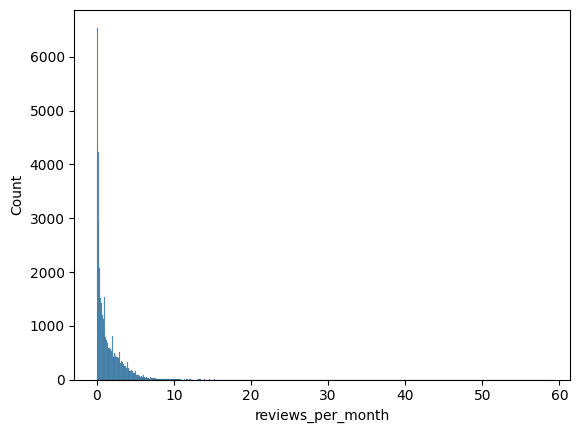

In [18]:
# checking if the distribution is normal

sns.histplot(data=df, x=df["reviews_per_month"])
plt.show()

In [22]:
pip install scipy

     -------------------------------------- 44.1/44.1 MB 952.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from scipy.stats import skew
df['reviews_per_month'].skew()

3.13018853561771

In [24]:
# iqr method
q1 = df.reviews_per_month.quantile(0.25)
q3 = df.reviews_per_month.quantile(0.75)

iqr = q3-q1
iqr

1.83

In [25]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.reviews_per_month<lower) | (df.reviews_per_month>upper)][['reviews_per_month']].head()

,reviews_per_month
471,6.70
534,6.62
553,7.14
1103,5.27
1125,5.12


In [27]:
df_iqr_transformed = df[(df.reviews_per_month>lower) & (df.reviews_per_month<upper)]
df_iqr_transformed

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,1,40


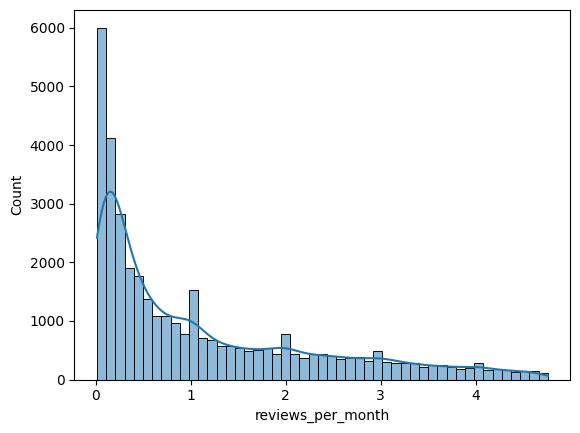

In [28]:
sns.histplot(data=df_iqr_transformed, x=df_iqr_transformed['reviews_per_month'], kde=True)
plt.show()

In [29]:
df_log_transformed = df.copy()

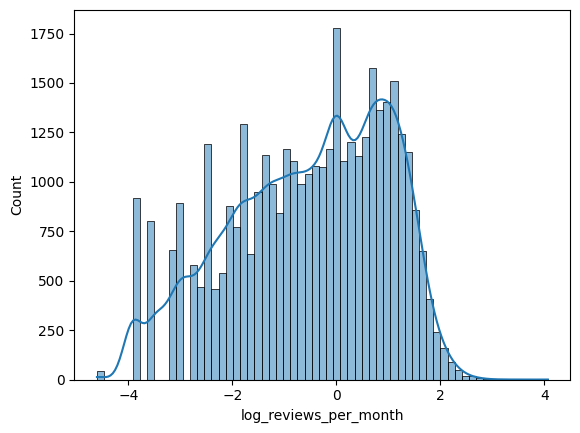

In [31]:
# log transformation
df_log_transformed.loc[:, 'log_reviews_per_month'] = np.log(df_log_transformed['reviews_per_month'])
sns.histplot(data=df_log_transformed, x=df_log_transformed['log_reviews_per_month'],kde = True)
plt.show()

In [32]:
df_zscore_transformed = df.copy()

In [33]:
# Z-score method
m = df_zscore_transformed.reviews_per_month.mean()
s = df_zscore_transformed.reviews_per_month.std()
lower = m-3*s
upper = m+3*s

In [34]:
df_zscore_transformed["ZScore"] = (df_zscore_transformed.reviews_per_month - m)/s
df_zscore_transformed[(df_zscore_transformed.ZScore<-3) | (df_zscore_transformed.ZScore>3)][['reviews_per_month']].head() #outliers

,reviews_per_month
471,6.70
534,6.62
553,7.14
1614,10.00
1627,10.00


In [38]:
# points other than outiliers
df_zscore_transformed = df[(df.reviews_per_month>lower) & (df.reviews_per_month<upper)]

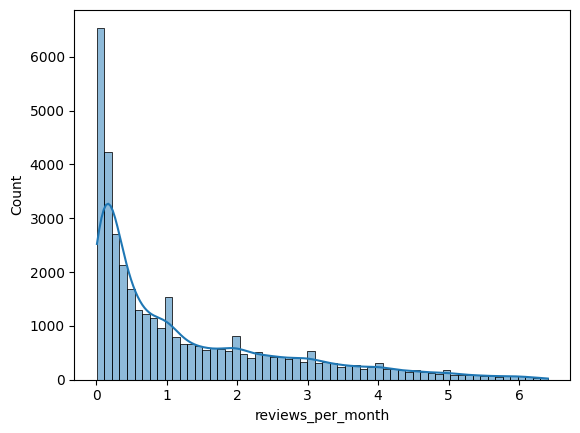

In [39]:
# plotting an histogram to check if it is in normal distribution
sns.histplot(data=df_zscore_transformed, x=df_zscore_transformed["reviews_per_month"], kde=True)
plt.show()

In [40]:
print("Skewness (Origininal): ", df['reviews_per_month'].skew())
print("Skewness (Log Transformed): ", df_log_transformed['log_reviews_per_month'].skew())
print("Skewness (IQR Transformed): ", df_iqr_transformed['reviews_per_month'].skew())
print("Skewness (Z-Score Transformed): ", df_zscore_transformed['reviews_per_month'].skew())

Skewness (Origininal):  3.13018853561771
Skewness (Log Transformed):  -0.39692134207938956
Skewness (IQR Transformed):  1.1777926200872912
Skewness (Z-Score Transformed):  1.3634540896469478


## Visualizing

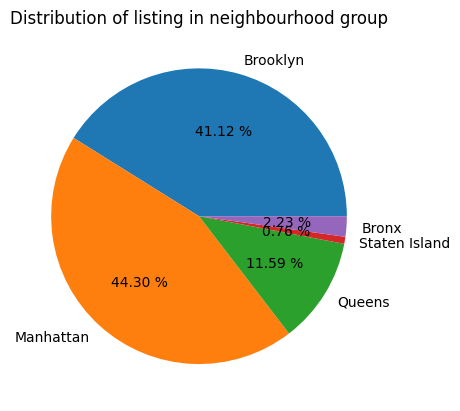

In [52]:
neighbourhood_group = df['neighbourhood_group'].unique()

count_of_listings = []

for i in neighbourhood_group:
    count_of_listings.append(
        df.loc[df['neighbourhood_group'] == i, 
               'neighbourhood_group'].value_counts().iloc[0])

plt.title('Distribution of listing in neighbourhood group')


plt.pie(count_of_listings, labels=neighbourhood_group, autopct='%.2f %%')
plt.show()

Text(0, 0.5, 'Count')

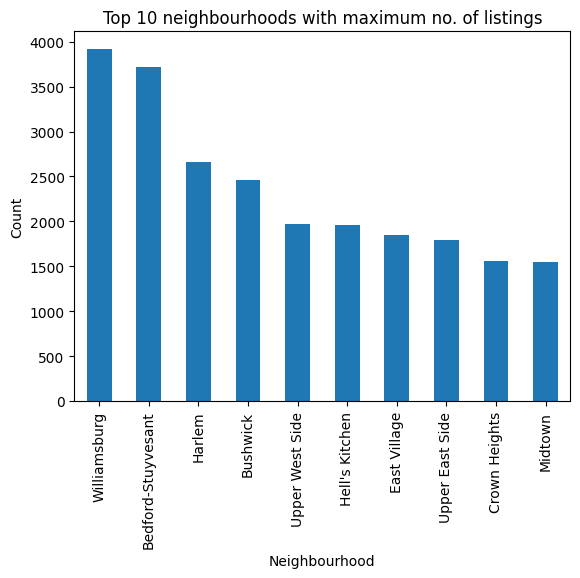

In [64]:
ax = df['neighbourhood'].value_counts().head(10).plot(kind='bar', title='Top 10 neighbourhoods with maximum no. of listings')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')

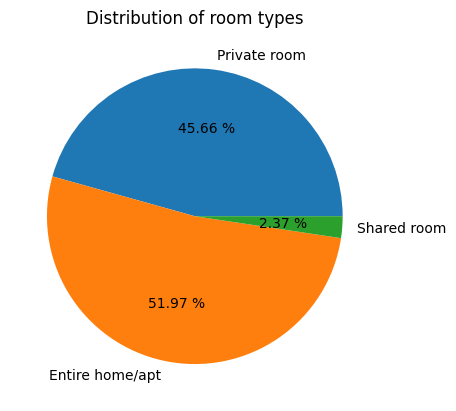

In [66]:
room_types = df['room_type'].unique()

no_of_listings = []
for i in room_types:
    no_of_listings.append(
    df.loc[df['room_type'] == i,
          'room_type'].value_counts().iloc[0])
    

plt.title('Distribution of room types')

plt.pie(no_of_listings, labels=room_types,autopct='%.2f %%')
plt.show()

Text(0.5, 0, 'Price')

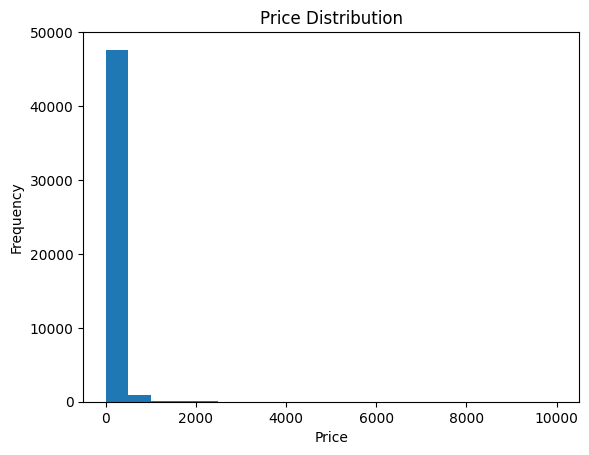

In [69]:
ax = df['price'].plot(kind='hist', 
                          bins=20, 
                          title='Price Distribution')
ax.set_xlabel('Price')

In [70]:
df['price'].skew()

19.118938995046033

In [71]:
# iqr method
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

iqr = q3-q1
iqr

106.0

In [72]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.price<lower) | (df.price>upper)][['price']].head()

,price
61,375
85,800
103,500
114,350
121,400


In [73]:
df_iqr_transformed = df[(df.price>lower) & (df.price<upper)]

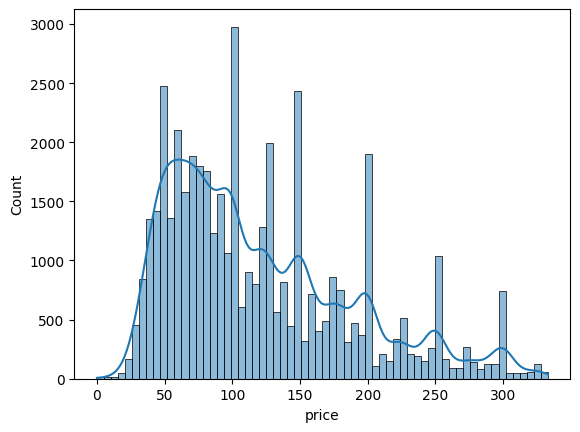

In [74]:
sns.histplot(data=df_iqr_transformed, x=df_iqr_transformed['price'], kde=True)
plt.show()

In [75]:
# Z-score method
m = df_zscore_transformed.price.mean()
s = df_zscore_transformed.price.std()
lower = m-3*s
upper = m+3*s

In [78]:
# finding out the datapoints other than outliers
df_zscore_transformed = df[(df.price>lower) & (df.price<upper)]

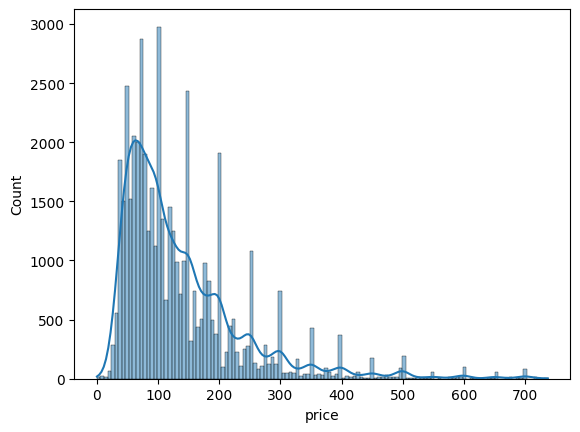

In [80]:
# plotting histogram to check if it is in normal distribution
sns.histplot(data=df_zscore_transformed, x=df_zscore_transformed["price"], kde=True)
plt.show()

In [82]:
# Group the data by 'host_id' and calculate the average of price
df_listings_by_Hosts = df.groupby(['host_id', 
                                   'neighbourhood_group', 
                                   'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings_by_Hosts.head()

,host_id,neighbourhood_group,calculated_host_listings_count,Average_price
0,2438,Brooklyn,1,95.000000
1,2571,Brooklyn,1,182.000000
2,2787,Brooklyn,6,100.666667
3,2845,Manhattan,2,162.000000
4,2868,Brooklyn,1,60.000000


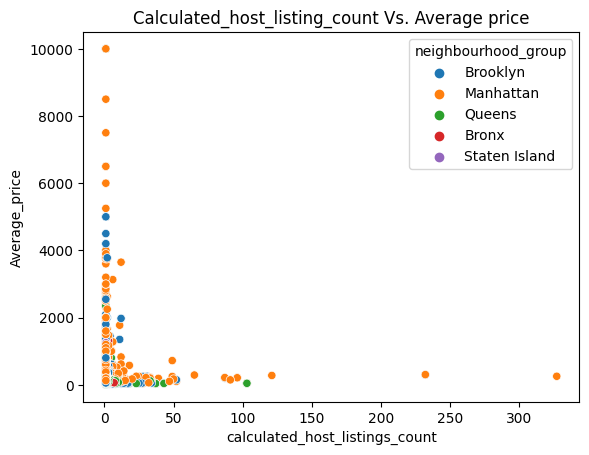

In [83]:
ax = sns.scatterplot(x='calculated_host_listings_count', 
                y='Average_price',
                hue='neighbourhood_group',
                data=df_listings_by_Hosts)
ax.set_title("Calculated_host_listing_count Vs. Average price")
plt.show()

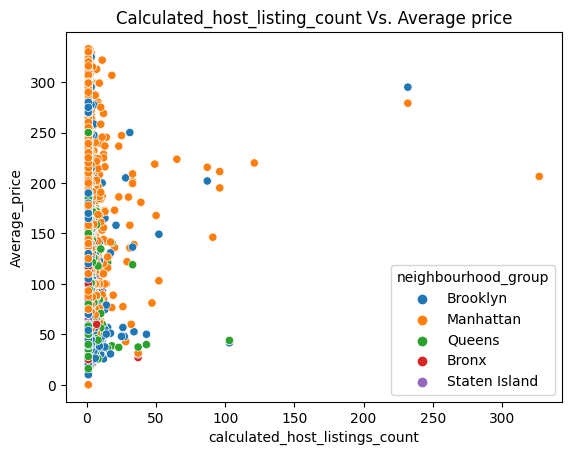

In [84]:
# data without outliers
df_listings_by_Hosts_IQR = df_iqr_transformed.groupby(['host_id', 
                                   'neighbourhood_group', 
                                   'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings_by_Hosts_IQR.head()

ax = sns.scatterplot(x='calculated_host_listings_count', 
                y='Average_price',
                hue='neighbourhood_group',
                data=df_listings_by_Hosts_IQR)
ax.set_title("Calculated_host_listing_count Vs. Average price")
plt.show()

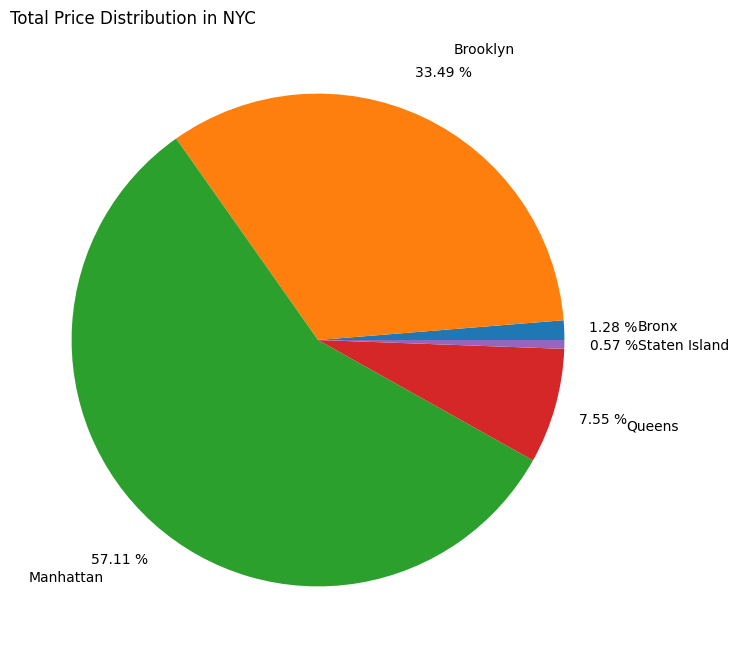

In [86]:
plt.figure(figsize=(8,8), dpi=100)
df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .sum() \
                                .reset_index(name='Total_price')

plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        pctdistance=1.2,
        labeldistance=1.3,
        autopct='%.2f %%')

plt.title('Total Price Distribution in NYC', loc="left")

plt.show()

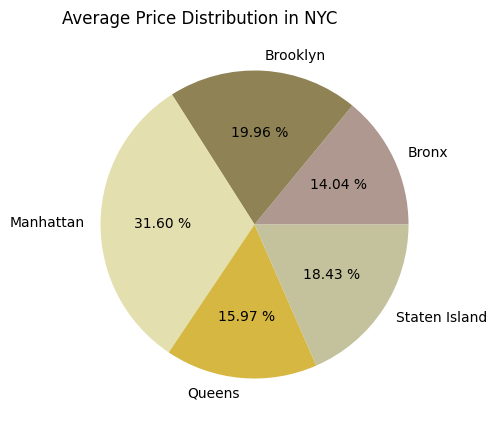

In [87]:
plt.figure(figsize=(8,5), dpi=100)

df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .mean() \
                                .reset_index(name='Total_price')

colors=["#AE9890", "#8F8255","#E4DFAF", "#D5B741",  "#C3C29C"]
plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        autopct='%.2f %%',
       colors=colors)

plt.title('Average Price Distribution in NYC', loc="left")

plt.show()

In [88]:
corr = df_iqr_transformed[['price',  
                           'minimum_nights', 
                           'number_of_reviews', 
                           'reviews_per_month', 
                           'calculated_host_listings_count', 
                           'availability_365']].corr()

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.031141,-0.027547,-0.035338,0.172891,0.066179
minimum_nights,0.031141,1.000000,-0.082851,-0.122758,0.133237,0.146329
number_of_reviews,-0.027547,-0.082851,1.000000,0.556406,-0.070357,0.183707
reviews_per_month,-0.035338,-0.122758,0.556406,1.000000,-0.017054,0.189891
calculated_host_listings_count,0.172891,0.133237,-0.070357,-0.017054,1.000000,0.225251
availability_365,0.066179,0.146329,0.183707,0.189891,0.225251,1.000000


<Axes: >

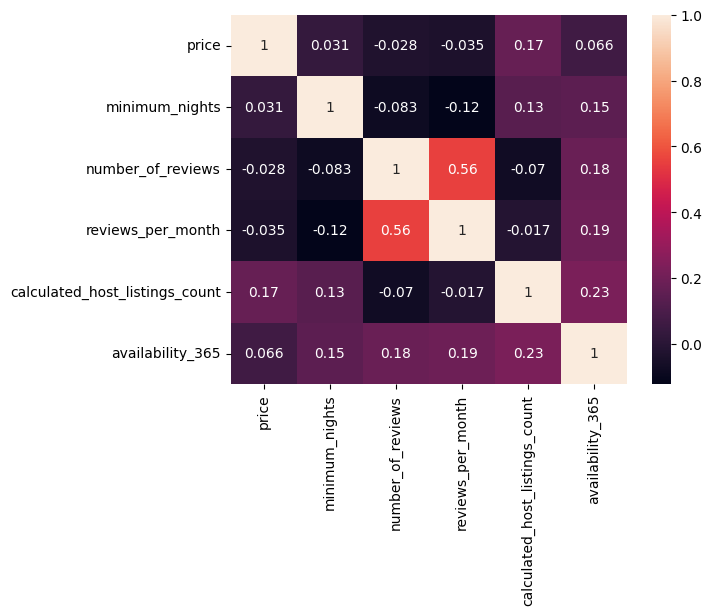

In [89]:
sns.heatmap(corr, annot=True)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


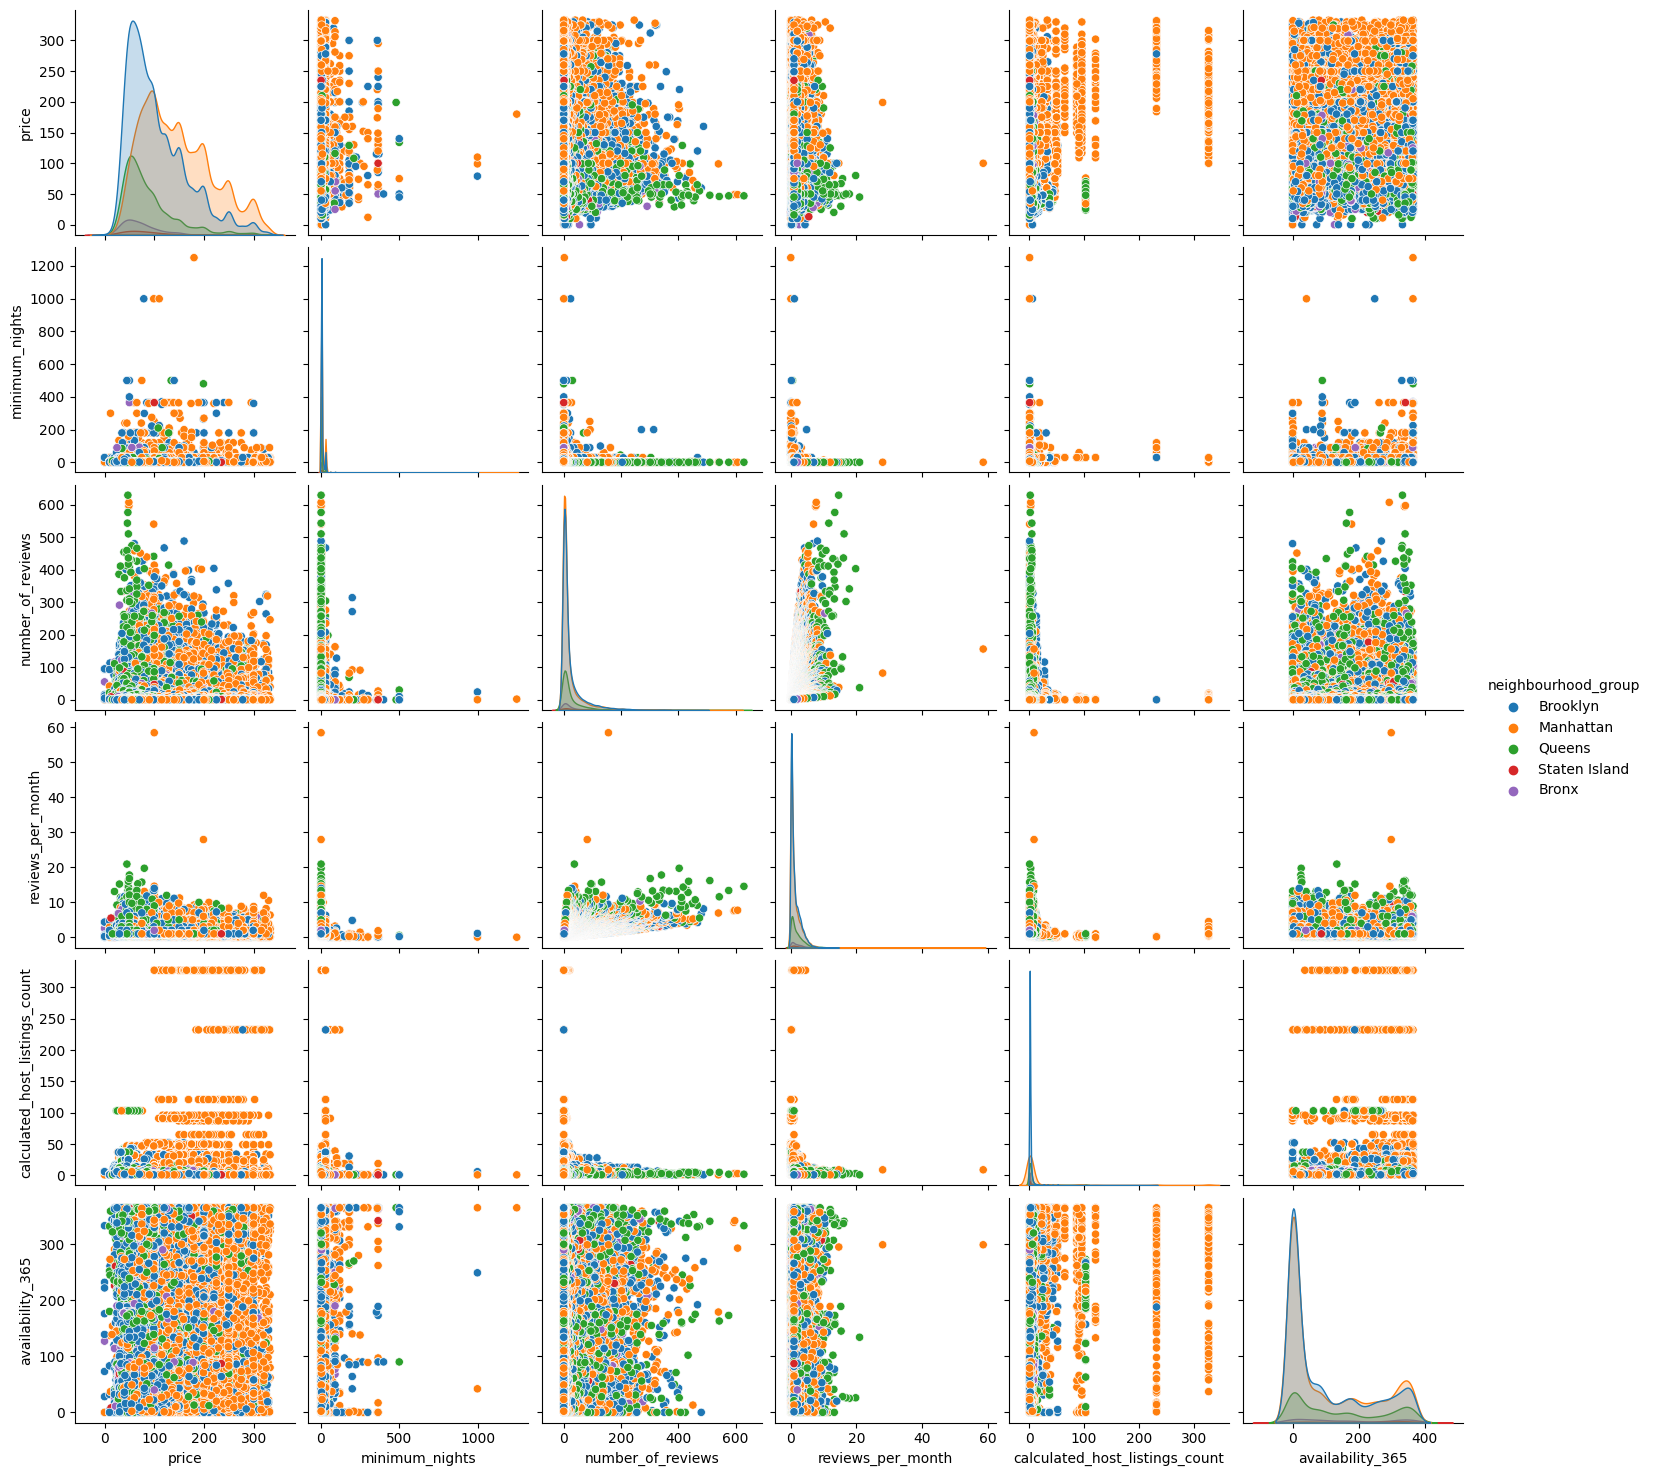

In [90]:
sns.pairplot(df_iqr_transformed, vars=['price',  
                           'minimum_nights', 
                           'number_of_reviews', 
                           'reviews_per_month', 
                           'calculated_host_listings_count', 
                           'availability_365'],
            hue='neighbourhood_group')
plt.show()

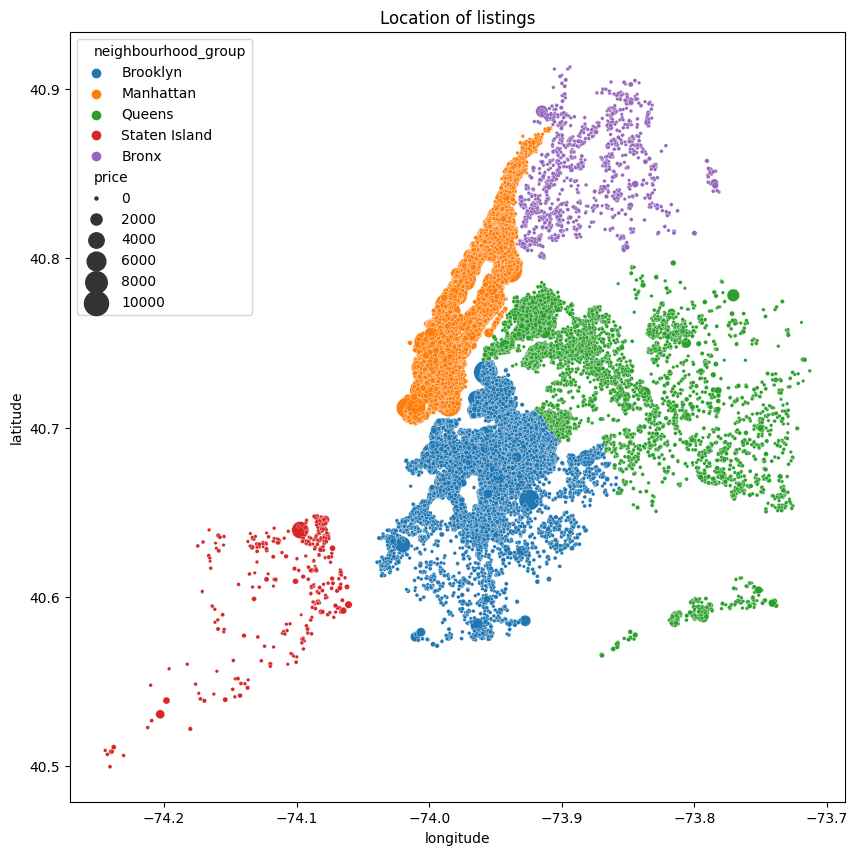

In [91]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="neighbourhood_group", 
                size="price",
                sizes=(5,300),
                data=df)
# Add labels and title
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Location of listings")

# Show plot
plt.show()